# EDA Final Report

Import Required Packages

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr
import geopandas as gpd


## Data Wrangling

### PM2.5 Data

In [211]:
# Importing and concatenating yearly data sets
pm25_2015 = pd.read_csv("pm2.5_2015.csv")
pm25_2016 = pd.read_csv("pm2.5_2016.csv")
pm25_2017 = pd.read_csv("pm2.5_2017.csv")
pm25_2018 = pd.read_csv("pm2.5_2018.csv")
pm25_2019 = pd.read_csv("pm2.5_2019.csv")
pm25_2020 = pd.read_csv("pm2.5_2020.csv")
pm25_2021 = pd.read_csv("pm2.5_2021.csv")
pm25_2022 = pd.read_csv("pm2.5_2022.csv")
pm25_2023 = pd.read_csv("pm2.5_2023.csv")
pm25_2024 = pd.read_csv("pm2.5_2024.csv")

pm25_data = pd.concat([pm25_2015, pm25_2016, pm25_2017, pm25_2018, pm25_2019, pm25_2020, pm25_2021, pm25_2022, pm25_2023, pm25_2024], ignore_index=True)

pm25_data.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2015,AQS,60010007,3,16.7,ug/m3 LC,65,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2015,AQS,60010007,3,23.1,ug/m3 LC,77,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2015,AQS,60010007,3,27.5,ug/m3 LC,85,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2015,AQS,60010007,3,28.2,ug/m3 LC,87,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2015,AQS,60010007,3,31.1,ug/m3 LC,92,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


Checking for Missing Values

In [212]:
pm25_data.isna().sum()

Date                                  0
Source                                0
Site ID                               0
POC                                   0
Daily Mean PM2.5 Concentration        0
Units                                 0
Daily AQI Value                       0
Local Site Name                    2287
Daily Obs Count                       0
Percent Complete                      0
AQS Parameter Code                    0
AQS Parameter Description             0
Method Code                       19451
Method Description                19451
CBSA Code                         40068
CBSA Name                         40068
State FIPS Code                       0
State                                 0
County FIPS Code                      0
County                                0
Site Latitude                         0
Site Longitude                        0
dtype: int64

Cleaning up data set

In [213]:
# Convert Date column to datetime and create columns for year and month
pm25_data["Date"] = pd.to_datetime(pm25_data["Date"])
pm25_data["Year"] = pm25_data["Date"].dt.year
pm25_data["Month"] = pm25_data["Date"].dt.month

# Only keeping relevant columns
pm25_data = pm25_data[["Date", "Daily Mean PM2.5 Concentration", "Units", "Daily AQI Value", "Site Latitude", "Site Longitude", "County", "Year", "Month"]]

# Reformatting column names: lowercase and replacing spaces with underscores
pm25_data.columns = pm25_data.columns.str.lower().str.replace(' ', '_')

Checking for outliers

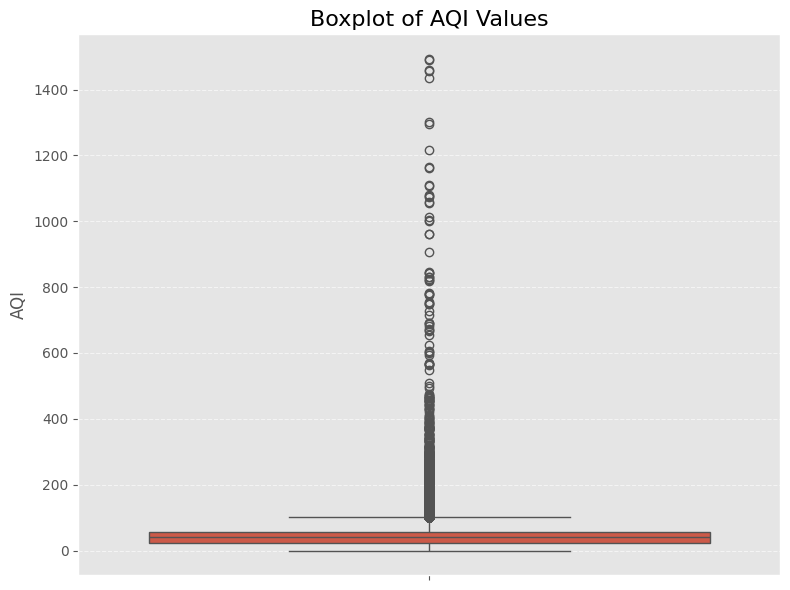

In [214]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=pm25_data['daily_aqi_value'])

# Customize the plot
plt.title('Boxplot of AQI Values', fontsize=16)
plt.ylabel('AQI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Remove rows with Daily AQI greater than 500

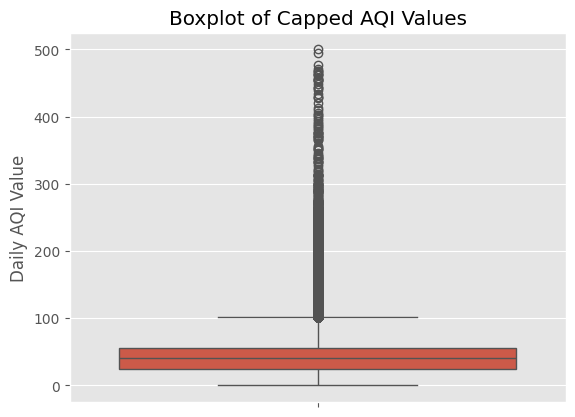

In [215]:
pm25_data = pm25_data.loc[pm25_data['daily_aqi_value'] <= 500]

# Plot a boxplot for the subset
sns.boxplot(y=pm25_data['daily_aqi_value'])
plt.title("Boxplot of Capped AQI Values")
plt.ylabel("Daily AQI Value")
plt.show()


In [216]:
pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535714 entries, 0 to 535774
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            535714 non-null  datetime64[ns]
 1   daily_mean_pm2.5_concentration  535714 non-null  float64       
 2   units                           535714 non-null  object        
 3   daily_aqi_value                 535714 non-null  int64         
 4   site_latitude                   535714 non-null  float64       
 5   site_longitude                  535714 non-null  float64       
 6   county                          535714 non-null  object        
 7   year                            535714 non-null  int32         
 8   month                           535714 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(2)
memory usage: 36.8+ MB


### Car Data

In [217]:
car_data2015 = pd.read_csv("dmv2015.csv", encoding = 'UTF-16', sep="\t")
car_data2016 = pd.read_csv("dmv2016.csv", encoding = 'UTF-16', sep="\t")
car_data2017 = pd.read_csv("dmv2017.csv", encoding = 'UTF-16', sep="\t")
car_data2018 = pd.read_csv("dmv2018.csv", encoding = 'UTF-16', sep="\t")
car_data2019 = pd.read_csv("dmv2019.csv", encoding = 'UTF-16', sep="\t")
car_data2020 = pd.read_csv("dmv2020.csv", encoding = 'UTF-16', sep="\t")
car_data2021 = pd.read_csv("dmv2021.csv", encoding = 'UTF-16', sep="\t")
car_data2022 = pd.read_csv("dmv2022.csv", encoding = 'UTF-16', sep="\t")
car_data2023 = pd.read_csv("dmv2023.csv", encoding = 'UTF-16', sep="\t")

# List of dataframes and corresponding years
dataframes = [
    (car_data2015, 2015),
    (car_data2016, 2016),
    (car_data2017, 2017),
    (car_data2018, 2018),
    (car_data2019, 2019),
    (car_data2020, 2020),
    (car_data2021, 2021),
    (car_data2022, 2022),
    (car_data2023, 2023),
]

# Add a 'Year' column to each dataset
for df, year in dataframes:
    df['Year'] = year

# Concatenate all dataframes into a single dataset
car_data = pd.concat([df for df, _ in dataframes], ignore_index=True)

# Preview the combined dataset
car_data.head()


,Counties,Autos,Trucks,Trailers,Motorcycles,Total Vehicles,Year
0,ALAMEDA,"1,082,464","178,753","60,858","34,267","1,356,342",2015
1,ALPINE,"2,801","1,121",403,79,"4,404",2015
2,AMADOR,"28,445","15,123","10,688","2,134","56,390",2015
3,BUTTE,"125,799","53,422","45,407","7,530","232,158",2015
4,CALAVERAS,"36,866","19,681","15,579","2,950","75,076",2015


In [218]:
car_data.isna().sum()

Counties           0
Autos             18
Trucks            18
Trailers          18
Motorcycles       18
Total Vehicles     0
Year               0
dtype: int64

Cleaning up data set

In [219]:
# Reformat column names: lowercase and replacing spaces with underscores
car_data.columns = car_data.columns.str.lower().str.replace(' ', '_')

# Changing county names from all capital to title format
car_data['counties'] = car_data['counties'].str.title()

# Drop rows with NaN in the specified columns
car_data = car_data.dropna(subset=['autos', 'trucks', 'trailers', 'motorcycles', 'total_vehicles', 'year'])

# Convert to integers
for col in ['autos', 'trucks', 'trailers', 'motorcycles', 'total_vehicles', 'year']:
    car_data[col] = car_data[col].astype(str).str.replace(",", "").astype(int)

In [220]:
# Dropping rows without information on county
rows_to_drop = ['Out Of State', 'Misc Vehicles *', 'Fee Exempt Vehicles', 'Statewide', 'Irp Vehicles **']

car_data.drop(car_data[car_data['counties'].isin(rows_to_drop)].index, inplace=True)

In [221]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 561
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   counties        522 non-null    object
 1   autos           522 non-null    int64 
 2   trucks          522 non-null    int64 
 3   trailers        522 non-null    int64 
 4   motorcycles     522 non-null    int64 
 5   total_vehicles  522 non-null    int64 
 6   year            522 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 32.6+ KB


### Gas Data

In [222]:
gas_data = pd.read_csv('GasByUtility.csv')
gas_data.head()

,Utility Type,Utility Name,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Total Usage
0,Investor owned utility,Pacific Gas and Electric Company,2015,34.473832,826.852780,52.868346,1758.804407,56.187360,1689.915151,4419.101876
1,Investor owned utility,Pacific Gas and Electric Company,2016,36.082045,857.762753,56.610838,1801.415004,69.707912,1745.544184,4567.122736
2,Investor owned utility,Pacific Gas and Electric Company,2017,36.367355,890.886204,59.003319,1683.825192,170.815491,1873.367168,4714.264729
3,Investor owned utility,Pacific Gas and Electric Company,2018,37.242809,899.093619,59.023642,1773.534151,190.215910,1832.781258,4791.891389
4,Investor owned utility,Pacific Gas and Electric Company,2019,34.322199,925.932501,61.558841,1845.786283,169.629088,1902.790915,4940.019827


Checking for missing values

In [223]:
gas_data.isna().sum()

Utility Type             0
Utility Name             0
Year                     0
Ag & Water Pump          0
Commercial Building      0
Commercial Other         0
Industry                 0
Mining & Construction    0
Residential              0
Total Usage              0
dtype: int64

Cleaning up data set

In [224]:
# Keeping relevant columns
gas_data = gas_data[["Year", "Total Usage"]]

# Reformat column names: lowercase and replacing spaces with underscores
gas_data.columns = gas_data.columns.str.lower().str.replace(' ', '_')


In [225]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         128 non-null    int64  
 1   total_usage  128 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


### Electricity Data

In [226]:
electricity_data = pd.read_csv('ElectricityByUtility.csv')
electricity_data.head()

,Utility Type,Utility Name,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Streetlight,Total Usage
0,Investor owned utility,Bear Valley Electric Service,2015,0.000000,50.037724,0.0,0.0,0.0,77.765492,0.195363,127.998579
1,Investor owned utility,Bear Valley Electric Service,2016,0.000000,46.388970,0.0,0.0,0.0,75.896265,0.192438,122.477673
2,Investor owned utility,Bear Valley Electric Service,2017,0.000000,44.630446,0.0,0.0,0.0,75.680675,0.192407,120.503528
3,Investor owned utility,Bear Valley Electric Service,2018,0.278864,45.044731,0.0,0.0,0.0,75.619148,0.191879,121.134622
4,Investor owned utility,Bear Valley Electric Service,2019,0.003800,52.709264,0.0,0.0,0.0,78.464967,0.193989,131.372020


Checking for missing values

In [227]:
electricity_data.isna().sum()

Utility Type             0
Utility Name             0
Year                     0
Ag & Water Pump          0
Commercial Building      0
Commercial Other         0
Industry                 0
Mining & Construction    0
Residential              0
Streetlight              0
Total Usage              0
dtype: int64

Cleaning up data set

In [228]:
# Keeping relevant columns
electricity_data = electricity_data[["Year", "Total Usage"]]

# Reformat column names: lowercase and replacing spaces with underscores
electricity_data.columns = electricity_data.columns.str.lower().str.replace(' ', '_')

In [229]:
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         512 non-null    int64  
 1   total_usage  512 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.1 KB


## Figures

Monthly Average PM2.5 AQI by County by Year

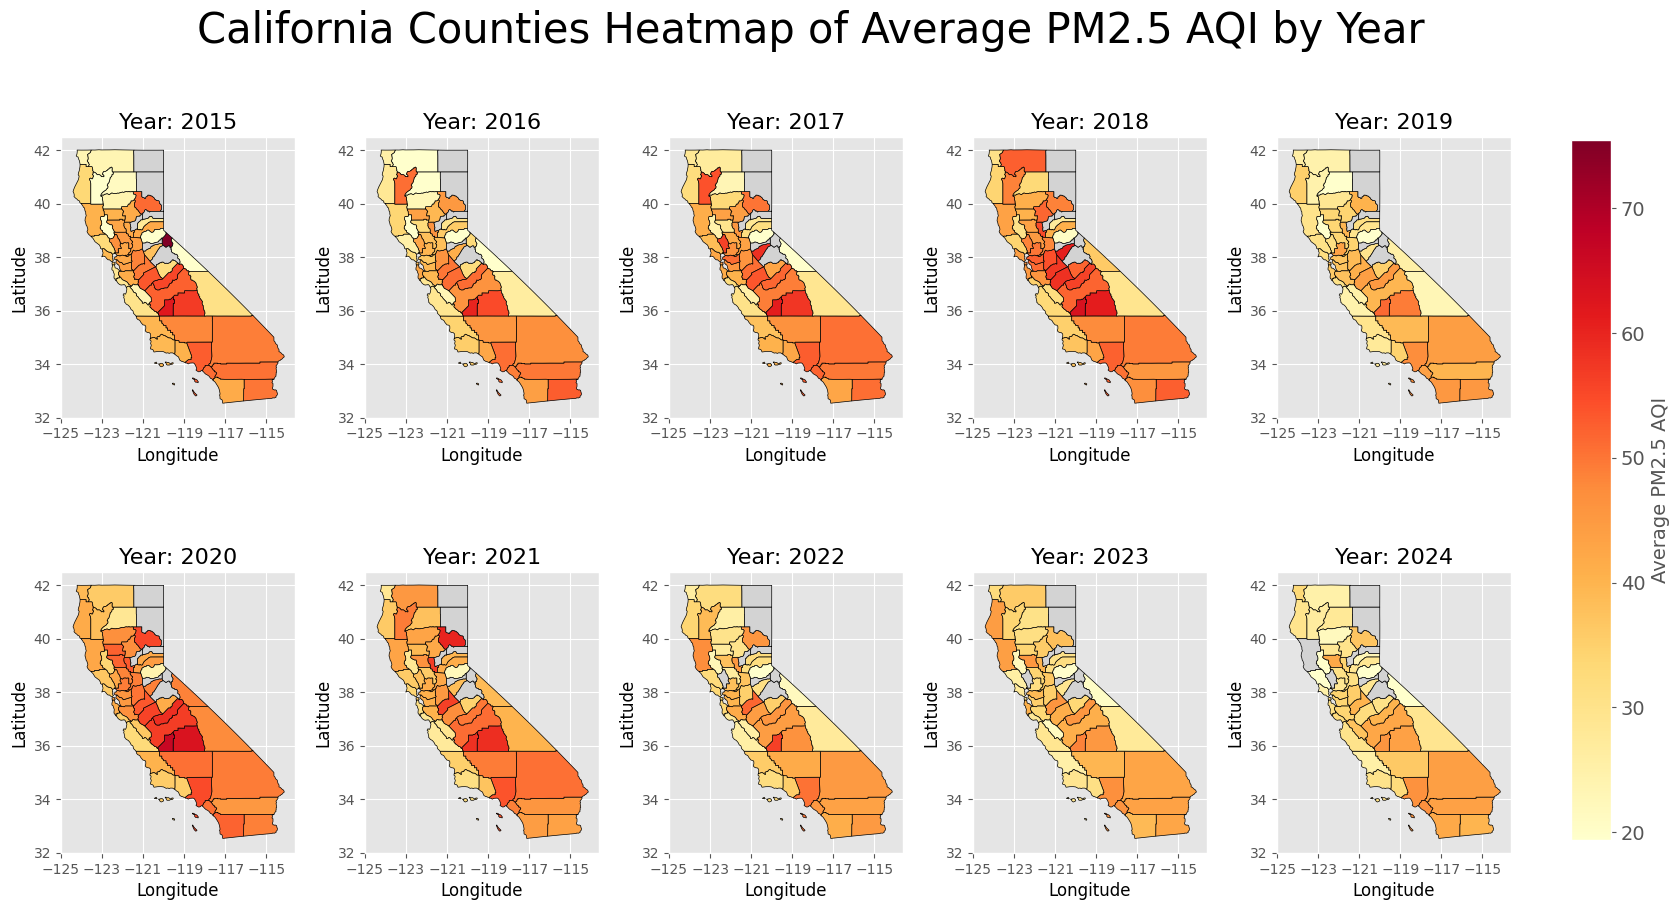

In [250]:
# Define the tick intervals for longitude and latitude
x_ticks = np.arange(-125, -114, 2)  # Adjust the range and interval as per California's extent
y_ticks = np.arange(32, 43, 2)      # Adjust the range and interval as per California's extent

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust vertical (hspace) and horizontal (wspace) spacing

axes = axes.flatten()

california_geojson = gpd.read_file("california-counties_780.geojson")

vmin = pm25_data.groupby('county')['daily_aqi_value'].mean().min()  # Minimum average AQI value
vmax = pm25_data.groupby('county')['daily_aqi_value'].mean().max()  # Maximum average AQI value

unique_years = pm25_data['year'].unique()
unique_years.sort()  # Sort the years to ensure chronological order

for i, year in enumerate(unique_years):
    # Filter data for the specific year
    yearly_data = pm25_data[pm25_data['year'] == year]
    county_aqi_year = yearly_data.groupby('county')['daily_aqi_value'].mean().reset_index()
    county_aqi_year.columns = ['NAME', 'Average_AQI']  # Match GeoJSON column
    
    # Merge GeoJSON with AQI data
    merged_geo = california_geojson.merge(county_aqi_year, on='NAME', how='left')
    
    # Plot heatmap for the year
    ax = axes[i]
    merged_geo.plot(
        column='Average_AQI',
        cmap='YlOrRd',
        legend=False,  # Suppress individual legends
        edgecolor='black',
        linewidth=0.5,
        vmin=vmin,  # Apply consistent vmin
        vmax=vmax,  # Apply consistent vmax
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    ax.set_title(f'Year: {year}', fontsize=16)
    ax.set_xticks(x_ticks)  # Set evenly spaced longitude ticks
    ax.set_yticks(y_ticks)  # Set evenly spaced latitude ticks
    ax.set_xlabel('Longitude', color = 'black', fontsize=12)
    ax.set_ylabel('Latitude', color = 'black', fontsize=12)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to leave space for the color bar
fig.subplots_adjust(right=0.85)  # Shrinks the grid to leave space for the color bar

# Add a single colorbar outside the grid
cax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # Adjust position to the right of the plots
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Dummy array for the colorbar

# Add colorbar with custom label and tick sizes
colorbar = fig.colorbar(sm, cax=cax, label='Average PM2.5 AQI')
colorbar.ax.tick_params(labelsize=14)  # Adjust tick font size
colorbar.set_label('Average PM2.5 AQI', fontsize=14)  # Adjust label font size

plt.suptitle('California Counties Heatmap of Average PM2.5 AQI by Year', fontsize=30)
plt.savefig("aqi_heatmap_by_year.png")
plt.show()


Monthly Average PM2.5 AQI by County Across All Years

<Figure size 1200x800 with 0 Axes>

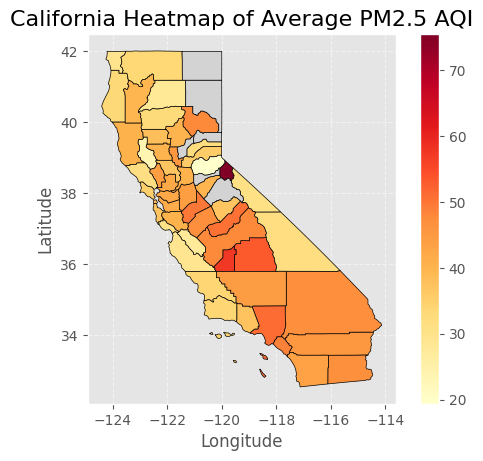

In [231]:
# Group by County and calculate the mean AQI across all years
county_aqi_all_years = pm25_data.groupby('county')['daily_aqi_value'].mean().reset_index()
county_aqi_all_years.columns = ['NAME', 'Average_AQI']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo_all_years = california_geojson.merge(county_aqi_all_years, on='NAME', how='left')

# Plot the heatmap
plt.figure(figsize=(12, 8))
merged_geo_all_years.plot(
    column='Average_AQI',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title("California Heatmap of Average PM2.5 AQI", fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("aqi_heatmap_all_years.png")
plt.show()


Monthly Average PM2.5 AQI Over Time

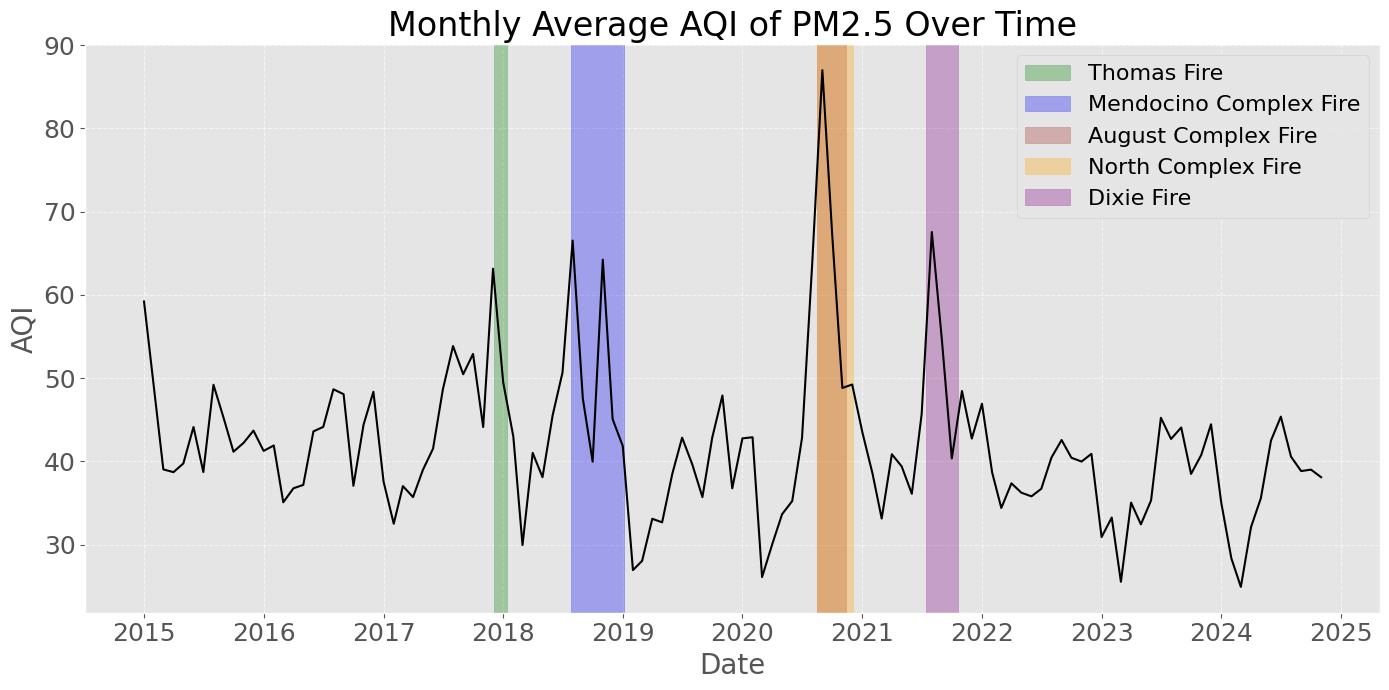

In [232]:
# Prepare the PM2.5 data (using Daily Mean PM2.5 Concentration)
pm25_data['Date'] = pd.to_datetime(pm25_data['date'])
pm25_data['YearMonth'] = pm25_data['date'].dt.to_period('M')
pm25_monthly_avg = pm25_data.groupby('YearMonth')['daily_aqi_value'].mean().reset_index()
pm25_monthly_avg['YearMonth'] = pm25_monthly_avg['YearMonth'].dt.to_timestamp()
pm25_monthly_avg.columns = ['YearMonth', 'PM2.5']  # Rename for consistency

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(pm25_monthly_avg["YearMonth"], pm25_monthly_avg['PM2.5'], color="black")

# Add shaded blocks
plt.axvspan('2017-12-04', '2018-01-12', color='green', alpha=0.3, label='Thomas Fire')
plt.axvspan('2018-07-27', '2019-01-04', color='blue', alpha=0.3, label='Mendocino Complex Fire')
plt.axvspan('2020-08-16', '2020-11-12', color='brown', alpha=0.3, label='August Complex Fire')
plt.axvspan('2020-08-17', '2020-12-03', color='orange', alpha=0.3, label='North Complex Fire')
plt.axvspan('2021-07-13', '2021-10-21', color='purple', alpha=0.3, label='Dixie Fire')

# Customize the plot
plt.title('Monthly Average AQI of PM2.5 Over Time', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('AQI', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the legend
plt.legend(fontsize=16)

# Show the plot
plt.savefig("avg_pm25_time_series.png")
plt.show()


Bar plot of average number of vehicles registered by county (THIS HAS TO BE FIXED)

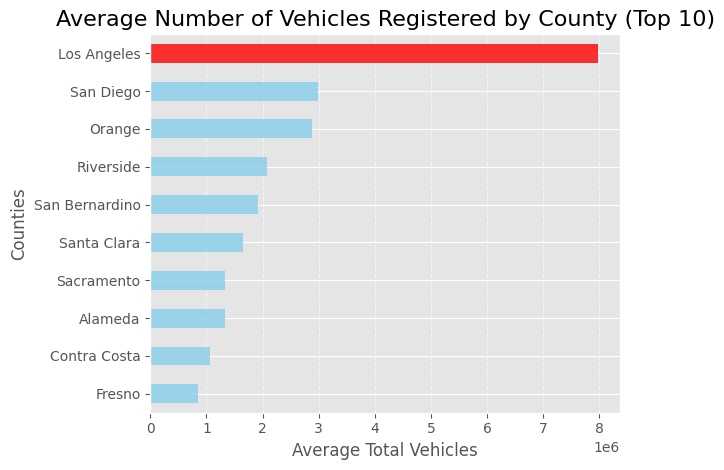

In [233]:
# Calculate average number of total vehicles across all years and sort
avg_total_vehicles = (
    car_data.groupby('counties')['total_vehicles'].mean().sort_values(ascending=True)
).tail(10)  # Select top 10 counties

# Assign colors: 'red' for Los Angeles, 'skyblue' for others
bar_colors = ['red' if county == 'Los Angeles' else 'skyblue' for county in avg_total_vehicles.index]

# Plot the sorted horizontal barplot of average total vehicles
avg_total_vehicles.plot(kind='barh', color=bar_colors, alpha=0.8)
plt.title('Average Number of Vehicles Registered by County (Top 10)', fontsize=16)
plt.xlabel('Average Total Vehicles', fontsize=12)
plt.ylabel('Counties', fontsize=12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig("car_barplot.png", bbox_inches='tight')
plt.show()

Scatter plot of PM2.5 concentration vs average number of registered vehicles

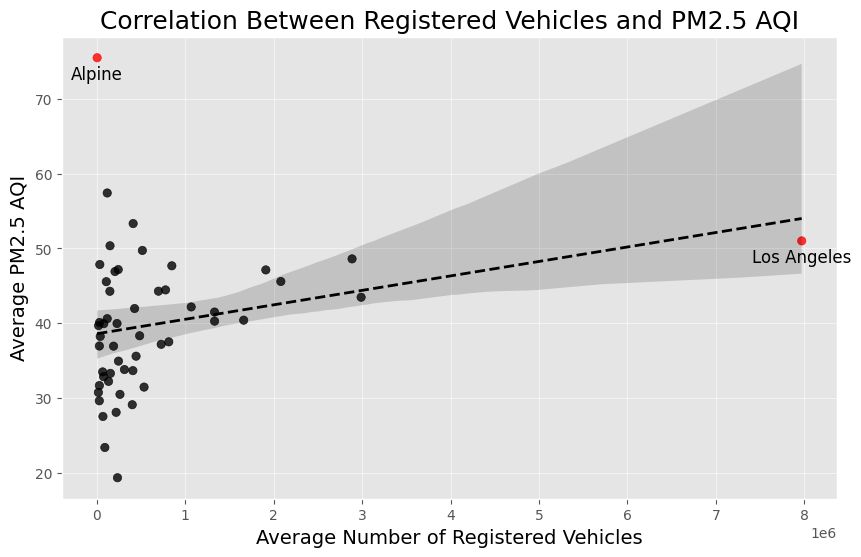

In [234]:
# Clean and aggregate PM2.5 data by county
pm25_by_county = pm25_data.groupby('county')['daily_aqi_value'].mean().reset_index()
pm25_by_county.columns = ['County', 'Average PM2.5']

# Clean and aggregate vehicle data by county
vehicle_by_county = car_data.groupby('counties')['total_vehicles'].mean().reset_index()
vehicle_by_county.columns = ['County', 'Average Vehicles']

# Merge datasets on county names
merged_data = pd.merge(vehicle_by_county, pm25_by_county, on='County', how='inner')

# Define a color list based on county names
colors = [
    'red' if county in ['Alpine', 'Los Angeles'] else 'black'
    for county in merged_data['County']
]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data['Average Vehicles'],
    merged_data['Average PM2.5'],
    c=colors,
    alpha=0.8,
)

# Add annotations for Alpine and Los Angeles
for i, row in merged_data.iterrows():
    if row['County'] in ['Alpine', 'Los Angeles']:
        plt.text(
            row['Average Vehicles'],
            row['Average PM2.5'] - 1.0,
            row['County'],
            fontsize=12,
            color='black',
            ha='center',  # Horizontal alignment
            va='top'  # Vertical alignment
        )

# Add regression line
sns.regplot(
    x='Average Vehicles',
    y='Average PM2.5',
    data=merged_data,
    scatter=False,  # Disable default scatterplot
    color="black",
    line_kws={"linewidth": 2, "linestyle": "--"},
)

# Customize the plot
plt.title("Correlation Between Registered Vehicles and PM2.5 AQI", fontsize=18)
plt.xlabel('Average Number of Registered Vehicles', fontsize=14, color="black")
plt.ylabel('Average PM2.5 AQI', fontsize=14, color="black")
plt.grid(alpha=0.5)

# Save and show the plot
plt.savefig("car_pm25_scatterplot.png", bbox_inches='tight')
plt.show()




Yearly Gas Consumption vs Average PM2.5 Levels 

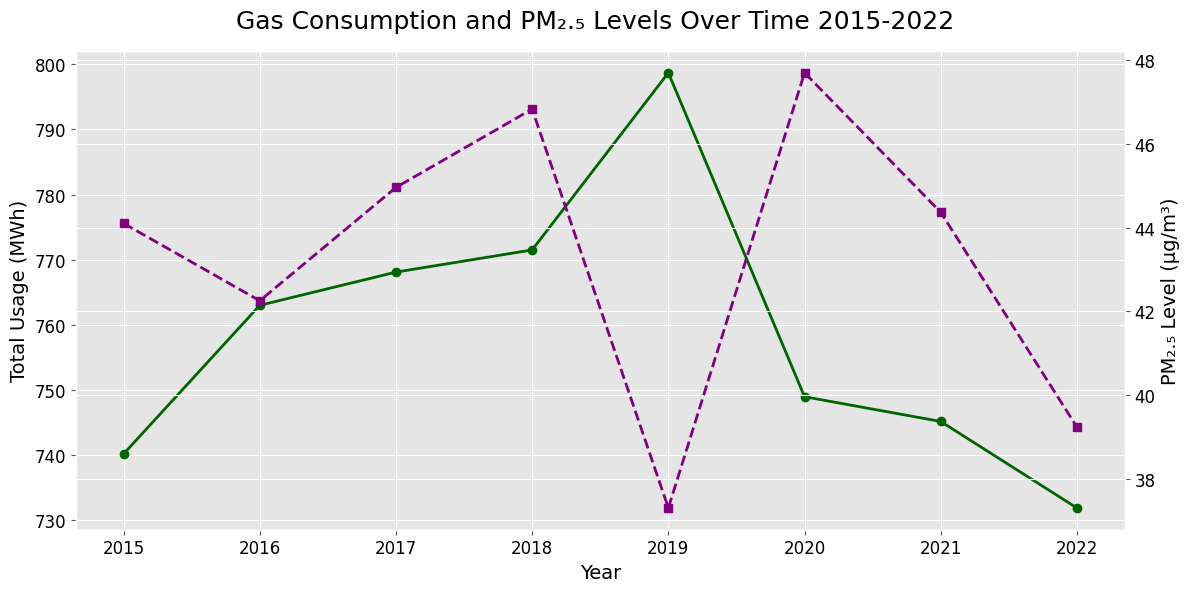

In [245]:
gas_aggregated = gas_data.groupby('year', as_index=False).agg({'total_usage': 'mean'})

# Aggregate PM2.5 data by year (mean values for PM2.5 levels)
pm25_aggregated = pm25_data.groupby('year', as_index=False).agg({'daily_aqi_value': 'mean'})

# Merge datasets on 'Year' column
merged_data = pd.merge(pm25_aggregated, gas_aggregated, on='year', how='left')

# Remove years 2023 and 2024 from gas data and merged data
merged_data = merged_data[~merged_data['year'].isin([2023, 2024])]

# Use a valid style for better aesthetics
plt.style.use('ggplot')  # A built-in Matplotlib style
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot gas consumption
ax1.plot(
    merged_data['year'],
    merged_data['total_usage'],
    color='darkgreen',
    linewidth=2,
    marker='o',
    label='Gas Consumption (MWh)'
)
ax1.set_xlabel('Year', color='black', fontsize=14)
ax1.set_ylabel('Total Usage (MWh)', color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)
ax1.tick_params(axis='x', labelcolor='black', labelsize=12)

# Plot PM2.5 levels
ax2 = ax1.twinx()
ax2.plot(
    merged_data['year'],
    merged_data['daily_aqi_value'],
    color='purple',
    linewidth=2,
    linestyle='--',
    marker='s',
    label='PM₂.₅ Level (µg/m³)'
)
ax2.set_ylabel('PM₂.₅ Level (µg/m³)', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Add title and legend
fig.suptitle('Gas Consumption and PM₂.₅ Levels Over Time 2015-2022', fontsize=18)
fig.tight_layout()
plt.savefig("gas_vs_pm25.png", bbox_inches='tight')
plt.show()


Yearly Electricity Consumption vs Average PM2.5 Levels

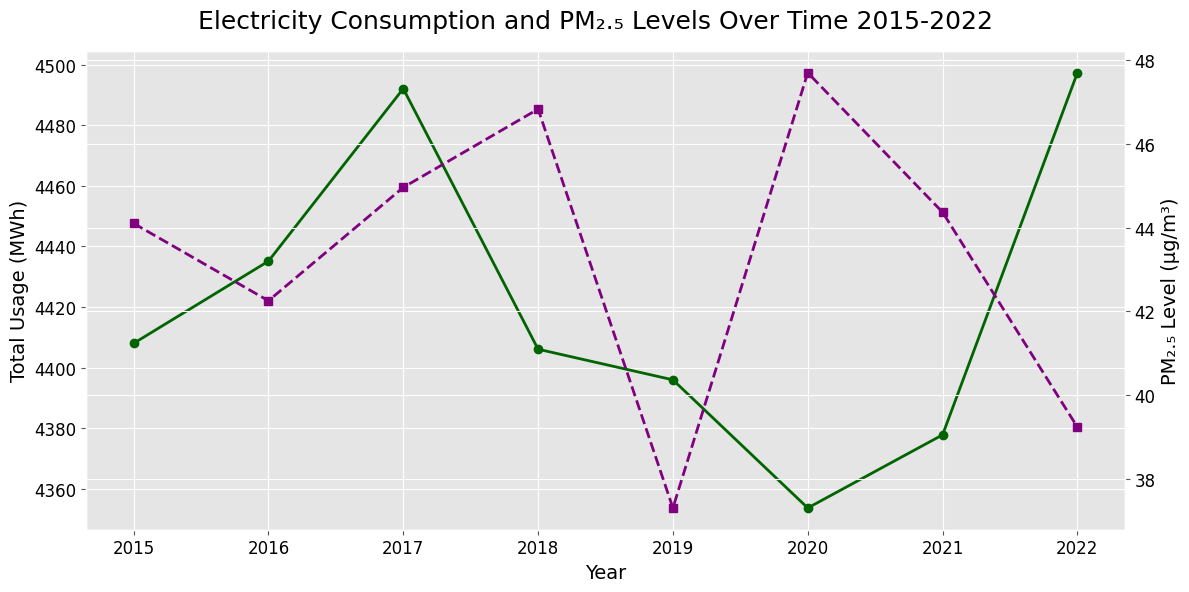

In [246]:
# Aggregate electricity data by year (average usage)
electricity_aggregated = electricity_data.groupby('year', as_index=False).agg({'total_usage': 'mean'})

# Aggregate PM2.5 data by year (mean values for PM2.5 levels)
pm25_aggregated = pm25_data.groupby('year', as_index=False).agg({'daily_aqi_value': 'mean'})

# Merge datasets on 'Year' column
merged_data = pd.merge(pm25_aggregated, electricity_aggregated, on='year', how='left')

# Remove years 2023 and 2024 from electricity data and merged data
merged_data = merged_data[~merged_data['year'].isin([2023, 2024])]

# Use a valid style for better aesthetics
plt.style.use('ggplot') 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot electricity consumption
ax1.plot(
    merged_data['year'],
    merged_data['total_usage'],
    color='darkgreen',
    linewidth=2,
    marker='o',
    label='Electricity Consumption (MWh)'
)
ax1.set_xlabel('Year', color='black', fontsize=14)
ax1.set_ylabel('Total Usage (MWh)', color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)
ax1.tick_params(axis='x', labelcolor='black', labelsize=12)

# Plot PM2.5 levels
ax2 = ax1.twinx()
ax2.plot(
    merged_data['year'],
    merged_data['daily_aqi_value'],
    color='purple',
    linewidth=2,
    linestyle='--',
    marker='s',
    label='PM₂.₅ Level (µg/m³)'
)
ax2.set_ylabel('PM₂.₅ Level (µg/m³)', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Add title and legend
fig.suptitle('Electricity Consumption and PM₂.₅ Levels Over Time 2015-2022', fontsize=18)
fig.tight_layout()
plt.savefig("electricity_vs_pm25.png", bbox_inches='tight')
plt.show()